In [15]:
# Handling images
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

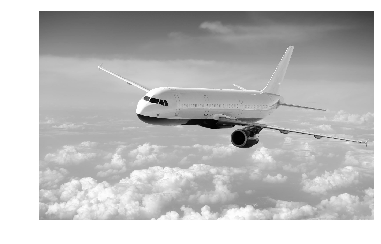

In [17]:
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [18]:
# show data type
type(image)

numpy.ndarray

In [19]:
# show image data
image

array([[ 79,  79,  79, ...,  56,  57,  57],
       [ 79,  79,  79, ...,  57,  57,  57],
       [ 79,  79,  79, ...,  57,  57,  57],
       ...,
       [151, 151, 151, ..., 209, 207, 206],
       [151, 151, 150, ..., 211, 209, 208],
       [151, 150, 150, ..., 211, 210, 209]], dtype=uint8)

In [20]:
image.shape

(1200, 1920)

In [21]:
image[0,0]

79

In [22]:
# load image in color
image_bgr = cv2.imread('plane.jpg', cv2.IMREAD_COLOR)
# show pixel
image_bgr[0, 0]

array([152,  91,  29], dtype=uint8)

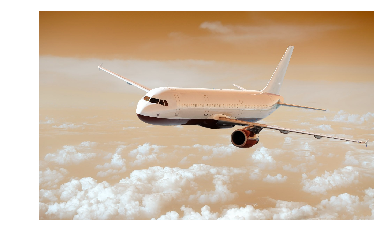

In [23]:
# in opencv there is BGR color code, but in most cases we use RGB
# and we get some error
plt.imshow(image_bgr), plt.axis('off')
plt.show()

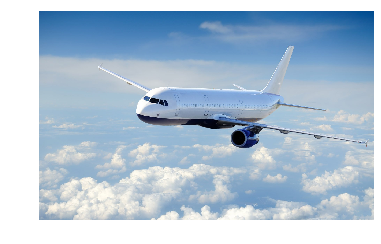

In [24]:
# now cinvert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

In [25]:
# saving images for preprocessing

# load image as grayscale
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)
# save image
cv2.imwrite('plane_new.jpg', image)

True

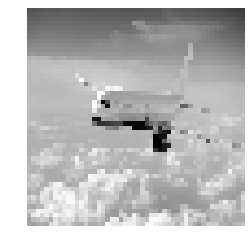

In [29]:
# resizing images
# load image as grayscale
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)
# resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

# view image
plt.imshow(image_50x50, cmap='gray'), plt.axis('off')
plt.show()

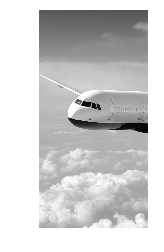

In [33]:
# cropping images
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)

# select a part of image
image_cropped = image[:, 400:1000]
# show image
plt.imshow(image_cropped, cmap='gray'), plt.axis('off')
plt.show()
# opencv represents images as matrices and it's ease to chose a  certain slice

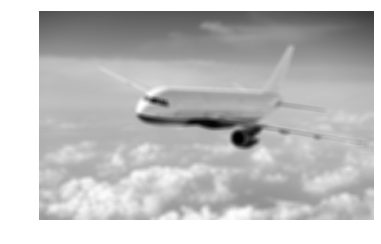

In [38]:
# bluring images
#load an image as greyscale
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)
# blur image
image_blurry = cv2.blur(image, (30,30))
# show image
plt.imshow(image_blurry, cmap='gray'), plt.axis('off')
plt.show()

In [40]:
# work with kernels for blurring
# create kernel
kernel = np.ones((30, 30)) / 900.0
kernel

array([[0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111],
       [0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111],
       [0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.

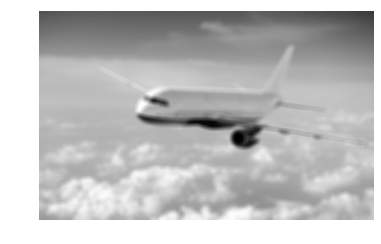

In [42]:
# kernel is normalized
# apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)
# show image
plt.imshow(image_kernel, cmap='gray'), plt.axis('off')
plt.show()
# we reach the same effect

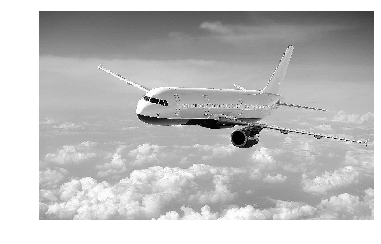

In [43]:
# sharpening images

#load image as grayscale
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)

# create kernel that highlight the target pixel
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
# sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

#show image
plt.imshow(image_sharp, cmap='gray'), plt.axis('off')
plt.show()

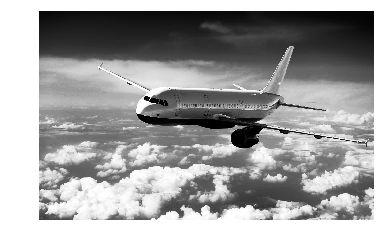

In [45]:
# enhancing contrast

# load image
image = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)
# enhance image
image_enchanced = cv2.equalizeHist(image)
# show image
plt.imshow(image_enchanced, cmap='gray'), plt.axis('off')
plt.show()

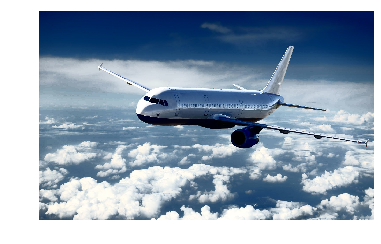

In [46]:
# work with color image

# load image
image_bgr = cv2.imread('plane.jpg')

# convert to YUV color format
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# convert to rgb
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# show image
plt.imshow(image_rgb), plt.axis('off')
plt.show()

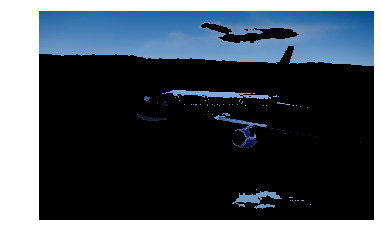

In [47]:
# isolating colors

# load image
image_bgr = cv2.imread('plane.jpg')
# convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# defina a range of blue values in HSV
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

# create a masl
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
# convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

#show image
plt.imshow(image_rgb), plt.axis('off')
plt.show()

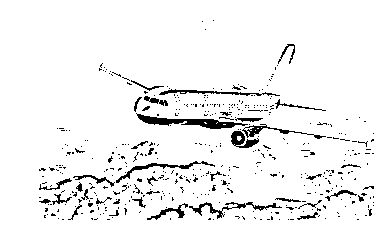

In [48]:
# binarizing images
# load image as grayscale
image_gray = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)

# apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

# show image
plt.imshow(image_binarized, cmap='gray'), plt.axis('off')
plt.show()

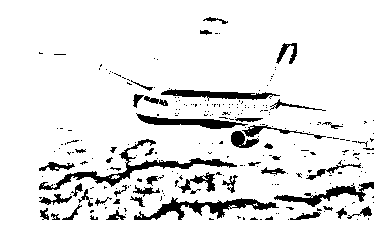

In [50]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_gray,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

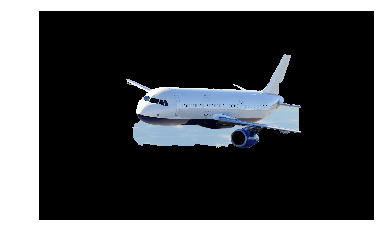

In [72]:
# removing backgrounds

# load image and convert to RGB
image_brg = cv2.imread('plane.jpg')
image_rgb = cv2.cvtColor(image_brg, cv2.COLOR_BGR2RGB)

# rectangle values: start x, start y, width, height
rectangle = (500, 250, 1000, 550)
# create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# run grabCut
cv2.grabCut(image_rgb,
           mask,
           rectangle,
           bgdModel,
           fgdModel,
           5,
           cv2.GC_INIT_WITH_RECT)

# create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# show image
plt.imshow(image_rgb_nobg), plt.axis('off')
plt.show()

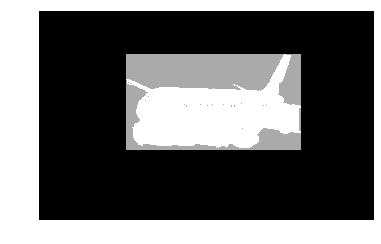

In [73]:
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

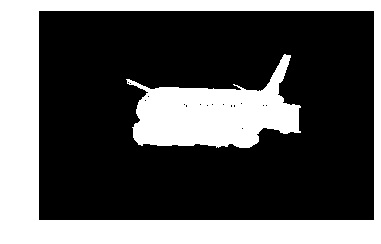

In [74]:
# show mask 2
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

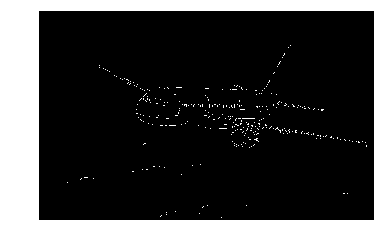

In [67]:
# detecting edges

# load image as grayscale
image_gray = cv2.imread('plane.jpg', cv2.IMREAD_GRAYSCALE)
# calculate median intensity
median_intensity = np.median(image_gray)

# set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# show image
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

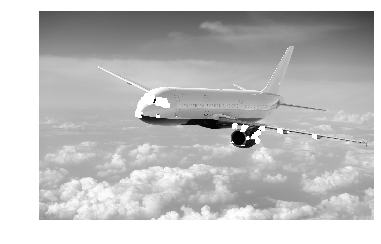

In [77]:
# detecting corners

# load image as grayscale
image_bgr = cv2.imread('plane.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# set corner detector parameters
block_size = 30
aperture = 29
free_parameter = 0.04

# detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                     block_size,
                                     aperture,
                                     free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]

# convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# show image
plt.imshow(image_gray, cmap='gray'), plt.axis('off')
plt.show()

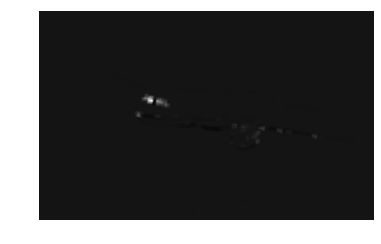

In [78]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()